In [9]:
import pandas as pd

Data_Set1 = pd.read_csv('Data_Set.csv')
Data_Set2 = pd.read_csv('Data_Set.csv', header = 2)    #remove unwanted rows
Data_Set3 = Data_Set2.rename(columns = {'Temperature' : 'Temp'})  #change column name
Data_Set4 = Data_Set3.drop('No. Occupants', axis = 1)        #remove column
#or
Data_Set3.drop('No. Occupants', axis = 1, inplace = True)    #no new dataset formed
Data_Set5 = Data_Set4.drop(2, axis = 0)                  #drop rows
Data_Set6 = Data_Set5.reset_index(drop = True)            #reset index number
Data_Set6.describe()                   #Summary

Min_item = Data_Set6['E_Heat'].min()
Data_Set6['E_Heat'][Data_Set6['E_Heat'] == Min_item]
Data_Set6['E_Heat'].replace(-4,21, inplace = True)

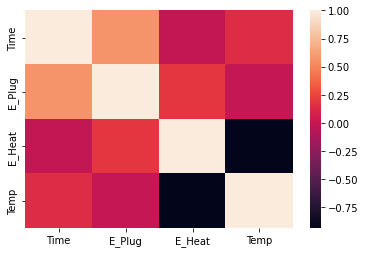

In [10]:
#covarience
Data_Set6.cov()
import seaborn as sn
sn.heatmap(Data_Set6.corr())

In [11]:
#missing values = 1
Data_Set6.info()
import numpy as np
Data_Set7 = Data_Set6.replace('!', np.NaN)             #spot abnormality
Data_Set7.info()
Data_Set7 = Data_Set7.apply(pd.to_numeric)             #convert variable to numeric
"""
#missing values = 2
Data_Set7.isnull()
Data_Set7.drop(13, axis = 0, inplace = True)          #delete NaN row (single)
Data_Set7.dropna(axis = 0, inplace = True)            #delete NaN rows (all)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


'\n#missing values = 2\nData_Set7.isnull()\nData_Set7.drop(13, axis = 0, inplace = True)          #delete NaN row (single)\nData_Set7.dropna(axis = 0, inplace = True)            #delete NaN rows (all)\n'

In [12]:
#another way
Data_Set8 = Data_Set7.fillna(method = 'ffill')   #fill the data from previous row

from sklearn.impute import SimpleImputer
M_Var = SimpleImputer(missing_values= np.nan, strategy='mean')
M_Var.fit(Data_Set7)
Data_Set9 = M_Var.transform(Data_Set7)
"""
#outlier detection
Data_Set8.boxplot()

Data_Set8['E_Plug'].quantile(0.25)
Data_Set8['E_Plug'].quantile(0.75)
"""

"\n#outlier detection\nData_Set8.boxplot()\n\nData_Set8['E_Plug'].quantile(0.25)\nData_Set8['E_Plug'].quantile(0.75)\n"

In [13]:
#replace outlier
Data_Set8['E_Plug'].replace(120, 42, inplace = True)

In [14]:
#preprocessing Concatenating
New_Col = pd.read_csv('Data_New.csv')
Data_Set10 = pd.concat([Data_Set8, New_Col], axis=1)

In [15]:
#dummy coding
Data_Set10.info()
Data_Set11 = pd.get_dummies(Data_Set10)
Data_Set11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     24 non-null     int64  
 1   E_Plug   24 non-null     float64
 2   E_Heat   24 non-null     int64  
 3   Price    24 non-null     float64
 4   Temp     24 non-null     int64  
 5   P/OffP   24 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             24 non-null     int64  
 1   E_Plug           24 non-null     float64
 2   E_Heat           24 non-null     int64  
 3   Price            24 non-null     float64
 4   Temp             24 non-null     int64  
 5   P/OffP _OffPeak  24 non-null     uint8  
 6   P/OffP _Peak     24 non-null     uint8  
dtypes: float64(

In [16]:
#normalization
from sklearn.preprocessing import minmax_scale, normalize

In [17]:
#minmax scale
Data_Set12 = minmax_scale(Data_Set11, feature_range=(0,1))

In [18]:
#normalize
Data_Set13 = normalize(Data_Set11, norm = 'l2', axis = 0)

Data_Set13 = pd.DataFrame(Data_Set13, columns=['Time','E_Plug',
                                               'E_Heat','Price','Temp','OffPeak','Peak'])